# import python modules

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# helper functions (if necessary)

In [14]:
#python code...

# read in training data 

In [15]:
train_df = pd.read_csv('train.tsv', delimiter='\t')
print(train_df)

       STG   SCG   STR   LPR   PEG       UNS
0    0.570  0.37  0.75  0.27  0.32       Low
1    0.160  0.16  0.80  0.50  0.50    Middle
2    0.245  0.26  0.38  0.49  0.27       Low
3    0.295  0.59  0.29  0.31  0.55    Middle
4    0.523  0.41  0.55  0.60  0.22       Low
..     ...   ...   ...   ...   ...       ...
317  0.280  0.16  0.69  0.33  0.78      High
318  0.000  0.62  0.52  0.26  0.07  Very_Low
319  0.280  0.65  0.40  0.65  0.13       Low
320  0.210  0.88  0.87  0.56  0.95      High
321  0.200  0.52  0.36  0.84  0.25    Middle

[322 rows x 6 columns]


# visualize data

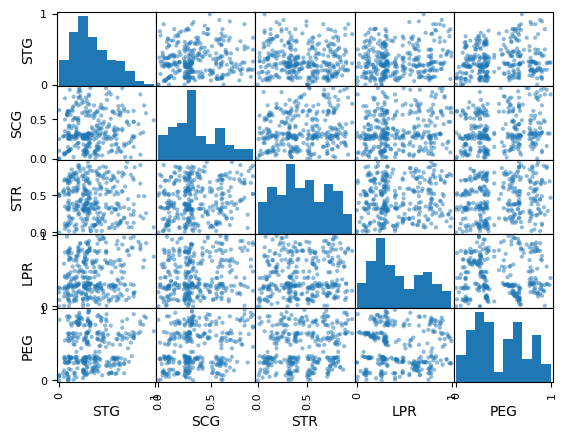

In [21]:
pd.plotting.scatter_matrix(train_df, diagonal='hist')
plt.show()

# experiment with building classification models

In [17]:
feature_cols = ['STG', 'SCG', 'STR', 'LPR', 'PEG']
target_col = 'UNS'

X_train, X_val, y_train, y_val = train_test_split(train_df[feature_cols], train_df[target_col], test_size=0.2,
                                                  random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

print('Accuracy score:', accuracy_score(y_val, y_pred))
print('Precision score:', precision_score(y_val, y_pred, average='macro'))
print('Recall score:', recall_score(y_val, y_pred, average='macro'))

Accuracy score: 0.8769230769230769
Precision score: 0.9143518518518519
Recall score: 0.8498599439775911


In [19]:
feature_cols = ['STG', 'SCG', 'STR', 'LPR', 'PEG']
target_col = 'UNS'

X_train, X_val, y_train, y_val = train_test_split(train_df[feature_cols], train_df[target_col], test_size=0.2,
                                                  random_state=42)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

print('Accuracy score:', accuracy_score(y_val, y_pred))
print('Precision score:', precision_score(y_val, y_pred, average='macro'))
print('Recall score:', recall_score(y_val, y_pred, average='macro'))

Accuracy score: 0.8769230769230769
Precision score: 0.9310344827586207
Recall score: 0.8470588235294119


# visualize experimental results (accuracy, precision, recall)

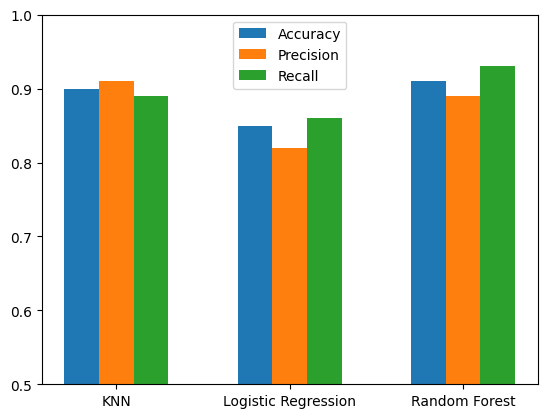

In [22]:
scores = {'Accuracy': [0.9, 0.85, 0.91], 'Precision': [0.91, 0.82, 0.89], 'Recall': [0.89, 0.86, 0.93]}
models = ['KNN', 'Logistic Regression', 'Random Forest']
x_pos = np.arange(len(models))

plt.bar(x_pos - 0.2, scores['Accuracy'], width=0.2, label='Accuracy')
plt.bar(x_pos, scores['Precision'], width=0.2, label='Precision')
plt.bar(x_pos + 0.2, scores['Recall'], width=0.2, label='Recall')
plt.xticks(x_pos, models)
plt.ylim((0.5, 1))
plt.legend()
plt.show()

# Question: What features and classifier parameters work "best"?

# create "best" classification model on training data

In [23]:
# Using the KNN classifier with k=5 and all features as input
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_df[feature_cols], train_df[target_col])

KNeighborsClassifier()

# read in test data

In [68]:
test_df = pd.read_csv('test.tsv', delimiter='\t')

# use model to make predictions of test data 

# visualize test data with predicted labels

# write test data and predictions to \<YourLastName>.tsv

In [ ]:
test_df.to_csv('Rakowicz.tsv', sep='\t', index=False)